In [1]:
from pykalman import KalmanFilter
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
filename = sys.argv[1]

In [2]:
#filename='sysinfo.csv'

In [3]:
cpu_data = pd.read_csv(filename,parse_dates=[4])



In [4]:
#plt.figure(figsize=(12, 4))
#plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.', alpha=0.5)
#plt.show() # maybe easier for testing
#plt.savefig('cpu.svg') # for final submission

In [5]:
loess_smoothed = lowess( cpu_data['temperature'],cpu_data['timestamp'],frac =0.05)


In [6]:
kalman_data = cpu_data[['temperature', 'cpu_percent', 'sys_load_1']]

In [7]:
initial_state = kalman_data.iloc[0]
observation_covariance = np.diag([0.9, 0.9, 0.9]) ** 2 # TODO: shouldn't be zero
transition_covariance = np.diag([0.1, 0.1, 0.1]) ** 2 # TODO: shouldn't be zero
transition = [[1, -1, 0.7], [0, 0.6, 0.03], [0, 1.3, 0.8]] # TODO: shouldn't (all) be zero

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


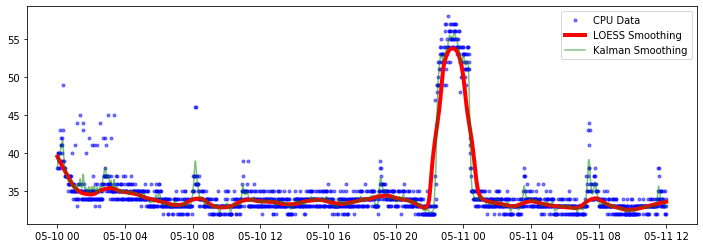

In [8]:
kf = KalmanFilter(initial_state_mean = initial_state, 
                  initial_state_covariance = observation_covariance, 
                  observation_covariance = observation_covariance, 
                  transition_covariance = transition_covariance, 
                  transition_matrices = transition)
kalman_smoothed, _ = kf.smooth(kalman_data)
plt.figure(figsize=(12, 4))
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.', alpha=0.5)
plt.plot(cpu_data['timestamp'],loess_smoothed[:, 1],'r-',linewidth=4)
plt.plot(cpu_data['timestamp'], kalman_smoothed[:, 0], 'g-', alpha=0.5)
plt.legend(['CPU Data', 'LOESS Smoothing', 'Kalman Smoothing'])
#plt.show()
plt.savefig('cpu.svg')